In [68]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [25]:
#get the data from the csv file and put it in a dataframe
df = pd.read_csv('/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/Sample_9000_manual.csv')

In [21]:
df.count()

Unnamed: 0             8986
repo_id                8986
status                 8986
pr_id                  8986
pullreq_id             8986
api_url                8986
 url                   8986
pr_url                 8979
pr_api_url             8986
author_id              8986
author_desc_body       8986
closer_id                 0
comments_counts        8986
comments               8986
commit_counts          8985
code_changes_counts    8986
created_at             8986
closed_at              8985
author_country         8986
closer_country         8986
author_continent       8986
same_country           8986
author_eth             8986
closer_eth             8986
same_eth               8986
prs_white              8592
prs_api                8592
prs_black              8592
prs_hispanic           8592
pri_white              8808
pri_black              8808
pri_api                8808
pri_hispanic           8808
prs_eth_8              8986
prs_eth_7              8986
prs_eth_9           

## Finding the distribution of the races based on PR rejection reasons

In [61]:
#drop the columns that are not needed
df.drop(['Unnamed: 0', 'repo_id', 'status', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

In [55]:
df.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,0,1.0,1,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,0,1.0,9,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,0,1.0,1,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,3,1.0,1,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,1,1.0,3,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [6]:
grouped_data = df.groupby(['author_eth', 'manual_analysis']).size().reset_index(name='count')
print(grouped_data)


   author_eth manual_analysis  count
0         API         Chaotic      3
1         API       Duplicate     21
2         API  Merge Conflict      8
3         API       No reason     89
4         API          Not PR      3
5         API         Quality     32
6         API        Replaced     69
7         API        Resolved     76
8         API           Stale     20
9         API      Successful    183
10        API     Unnecessary    118
11      Black         Chaotic      1
12      Black       Duplicate      1
13      Black         Quality      1
14      Black        Replaced      1
15      Black        Resolved      2
16      Black           Stale      1
17      Black      Successful      4
18   Hispanic         Chaotic      2
19   Hispanic       Duplicate      7
20   Hispanic  Merge Conflict      1
21   Hispanic       No reason     34
22   Hispanic         Quality     12
23   Hispanic        Replaced     24
24   Hispanic        Resolved     28
25   Hispanic           Stale      5
2

In [7]:
#how many values in column author_eth has the value 'Black
print(df['author_eth'].value_counts())

author_eth
White       5155
Unknown     2981
API          622
Hispanic     217
Black         11
Name: count, dtype: int64


In [35]:
pivot_table = grouped_data.pivot_table(index='author_eth', columns='manual_analysis', values='count', fill_value=0)
print(pivot_table)


manual_analysis  Chaotic  Duplicate  Merge Conflict  No reason  Not PR   
author_eth                                                               
API                    3         21               8         89       3  \
Black                  1          1               0          0       0   
Hispanic               2          7               1         34       0   
Unknown               18        119              44        543      12   
White                 14        235              51        636       5   

manual_analysis  Quality  Replaced  Resolved  Stale  Successful  Unnecessary  
author_eth                                                                    
API                   32        69        76     20         183          118  
Black                  1         1         2      1           4            0  
Hispanic              12        24        28      5          52           52  
Unknown              167       251       313     91         722          701  
White  

In [36]:
pivot_table['Total'] = pivot_table.sum(axis=1)
for col in pivot_table.columns[:-1]:  # Exclude the 'Total' column
    pivot_table[col] = (pivot_table[col] / pivot_table['Total']) * 100

#make a dataframe of the pivot table
pivot_df = pd.DataFrame(pivot_table)
print(pivot_table)

manual_analysis   Chaotic  Duplicate  Merge Conflict  No reason    Not PR   
author_eth                                                                  
API              0.482315   3.376206        1.286174  14.308682  0.482315  \
Black            9.090909   9.090909        0.000000   0.000000  0.000000   
Hispanic         0.921659   3.225806        0.460829  15.668203  0.000000   
Unknown          0.603824   3.991949        1.476015  18.215364  0.402549   
White            0.271581   4.558681        0.989331  12.337536  0.096993   

manual_analysis   Quality   Replaced   Resolved     Stale  Successful   
author_eth                                                              
API              5.144695  11.093248  12.218650  3.215434   29.421222  \
Black            9.090909   9.090909  18.181818  9.090909   36.363636   
Hispanic         5.529954  11.059908  12.903226  2.304147   23.963134   
Unknown          5.602147   8.419993  10.499832  3.052667   24.220060   
White            5.722

In [38]:
pivot_df

manual_analysis,Chaotic,Duplicate,Merge Conflict,No reason,Not PR,Quality,Replaced,Resolved,Stale,Successful,Unnecessary,Total
author_eth,,,,,,,,,,,,
API,0.482315,3.376206,1.286174,14.308682,0.482315,5.144695,11.093248,12.218650,3.215434,29.421222,18.971061,622
Black,9.090909,9.090909,0.000000,0.000000,0.000000,9.090909,9.090909,18.181818,9.090909,36.363636,0.000000,11
Hispanic,0.921659,3.225806,0.460829,15.668203,0.000000,5.529954,11.059908,12.903226,2.304147,23.963134,23.963134,217
Unknown,0.603824,3.991949,1.476015,18.215364,0.402549,5.602147,8.419993,10.499832,3.052667,24.220060,23.515599,2981
White,0.271581,4.558681,0.989331,12.337536,0.096993,5.722599,9.796314,12.065955,3.064985,29.738118,21.357905,5155


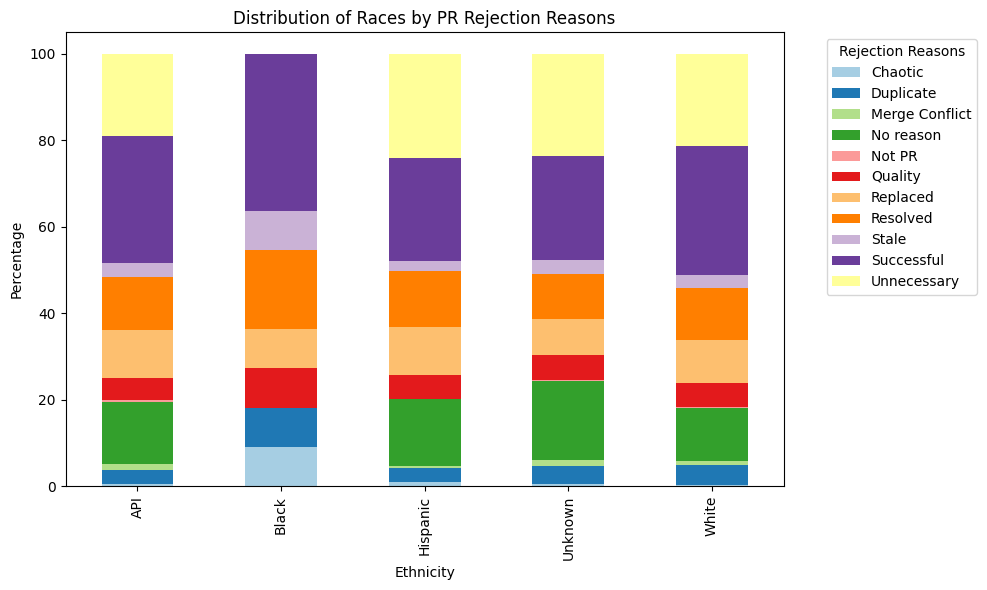

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
# remove the total column
pivot_table = pivot_table.drop('Total', axis=1)
custom_palette = sns.color_palette("Paired", n_colors=len(df['manual_analysis'].unique()))
pivot_table.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)

# Add labels and legend
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Races by PR Rejection Reasons')
ax.legend(title='Rejection Reasons', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Balancing the samples

In [35]:
#reading the non-merged dataset
df_comp = pd.read_csv('/Users/amirrshams/UW/Thesis/Datasets/non_merged/pr_non_merged_final_April_2023.csv')

In [36]:
#how many values in column author_eth has the value 'Black
print(df_comp['author_eth'].value_counts())

author_eth
White       249293
Unknown     142358
API          30101
Hispanic     11104
Black          535
Name: count, dtype: int64


In [37]:
dCounts = {
    'API': 2500,
    'Black': 524,
    'Hispanic': 3006
}

data = df_comp[~df_comp.isin(df.to_dict('list')).all(axis= 1)]

balanced_data = pd.DataFrame(columns=df_comp.columns)

for race, count in dCounts.items():
    subset = data[data['author_eth'] == race]
    
    # Sample 'count' number of rows randomly from the subset
    sampled_subset = subset.sample(count, random_state=42)
    
    # Append the sampled subset to the balanced dataset
    balanced_data = pd.concat([balanced_data, sampled_subset])

In [38]:
balanced_data.count()

Unnamed: 0             6030
repo_id                6030
status                 6030
pr_id                  6030
pullreq_id             6030
api_url                6030
 url                   6030
pr_url                 6030
pr_api_url             6030
author_id              6030
author_desc_body       6030
closer_id                 0
comments_counts        6030
comments               6030
commit_counts          6030
code_changes_counts    6030
created_at             6030
closed_at              6030
author_country         6030
closer_country         6030
author_continent       6030
same_country           6030
author_eth             6030
closer_eth             6030
same_eth               6030
prs_white              6030
prs_api                6030
prs_black              6030
prs_hispanic           6030
pri_white              5918
pri_black              5918
pri_api                5918
pri_hispanic           5918
prs_eth_8              6030
prs_eth_7              6030
prs_eth_9           

In [39]:
print(balanced_data['author_eth'].value_counts())

author_eth
Hispanic    3006
API         2500
Black        524
Name: count, dtype: int64


In [41]:
balanced_data.head(100)

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
6686,27566,340,not-merged,11963817,4797,https://api.github.com/repos/netty/netty,https://github.com/netty/netty,https://github.com/netty/netty/pull/4797,https://api.github.com/repos/netty/netty/pulls...,windie,Motivation:\n\nSome duplicated methods in mess...,NaN,2.0,"['This one replaced #4784\n', 'Cherry-picked i...",1.0,5.0,2016-01-31T00:03:23Z,2016-02-01T14:51:23Z,\N,germany,\N,0,API,White,0,0.000273,0.999630,0.000004,0.000012,0.992539,0.000581,0.003632,0.002701,API,API,API,API,API
197496,1037280,216519,not-merged,1227833,314,https://api.github.com/repos/inliniac/suricata,https://github.com/inliniac/suricata,https://github.com/inliniac/suricata/pull/314,https://api.github.com/repos/inliniac/suricata...,poona,Packet inserted by live swap flagged as pseudo...,NaN,1.0,"['Merged, thanks!\n']",1.0,1.0,2013-03-07T16:06:44Z,2013-03-07T16:43:04Z,\N,netherlands,\N,0,API,Unknown,0,0.019453,0.976434,0.000139,0.000373,0.647092,0.229477,0.012511,0.105475,API,API,API,API,API
366934,2093809,9706049,not-merged,47419663,27676,https://api.github.com/repos/odoo/odoo,https://github.com/odoo/odoo,https://github.com/odoo/odoo/pull/27676,https://api.github.com/repos/odoo/odoo/pulls/2...,dbh-odoo,Task: https://www.odoo.com/web#id=1891804&acti...,NaN,3.0,"[""[REF] mrp, mrp_zebra, stock, stock_zebra: re...",1.0,53.0,2018-10-11T11:55:57Z,2019-01-25T12:13:12Z,\N,\N,\N,0,API,Unknown,0,0.169333,0.828365,0.000950,0.001279,0.509926,0.455632,0.024189,0.007867,API,API,Unknown,API,API
234472,1297487,1545591,not-merged,3314112,1048,https://api.github.com/repos/opf/openproject,https://github.com/opf/openproject,https://github.com/opf/openproject/pull/1048,https://api.github.com/repos/opf/openproject/p...,marutosi,\N,NaN,3.0,['I think the merge was bad. The changelog now...,15.0,1.0,2014-03-22T00:48:11Z,2014-03-28T10:03:33Z,\N,\N,\N,0,API,Unknown,0,0.008356,0.987823,0.000097,0.001402,0.303911,0.002034,0.686865,0.004707,API,API,API,API,API
366537,2093334,9706049,not-merged,43778077,26274,https://api.github.com/repos/odoo/odoo,https://github.com/odoo/odoo,https://github.com/odoo/odoo/pull/26274,https://api.github.com/repos/odoo/odoo/pulls/2...,dbh-odoo,Description of the issue/feature this PR addre...,NaN,4.0,['Merged https://github.com/odoo/odoo/commit/a...,4.0,10.0,2018-08-09T10:51:14Z,2018-08-12T19:24:43Z,\N,\N,\N,0,API,White,0,0.169333,0.828365,0.000950,0.001279,0.973169,0.018966,0.002153,0.004863,API,API,Unknown,API,API
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394147,2240750,11604618,not-merged,16625002,583,https://api.github.com/repos/rpm-software-mana...,https://github.com/rpm-software-management/dnf,https://github.com/rpm-software-management/dnf...,https://api.github.com/repos/rpm-software-mana...,pnemade,In the last FESCo meeting it was decided that ...,NaN,8.0,"['@dnf-bot r+\n', ':pushpin: Commit 445e86d ha...",1.0,1.0,2016-08-29T05:44:43Z,2016-08-29T07:12:51Z,\N,\N,\N,0,API,Unknown,0,0.006614,0.993247,0.000058,0.000049,0.963558,0.005711,0.021407,0.006999,API,API,API,API,API
331053,1904852,7436295,not-merged,11398622,162,https://api.github.com/repos/stcr/subscribe-to...,https://github.com/stcr/subscribe-to-comments-...,https://github.com/stcr/subscribe-to-comments-...,https://api.github.com/repos/stcr/subscribe-to...,raamdev,![2016-01-05_09-21-29](https://cloud.githubuse...,NaN,1.0,"['Thank you,\n\nSince the pull request https:/...",1.0,1.0,2016-01-05T14:29:14Z,2016-01-05T15:49:40Z,united states,mexico,North America,0,API,Hisp

In [99]:
#add an empty column called "manual_analysis" to the balanced dataset
balanced_data['manual_analysis'] = np.nan

In [ ]:
#divide this into 6 dataframes file each of them should have the header

balanced_data.to_csv('/Users/amirrshams/UW/Thesis/Datasets/non_merged/balanced_data.csv', index=False)


In [102]:
# save to the csv file with dividing into 6 different files


output_directory = '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/samples_based_on_race'

# Split 'balanced_data' into 6 roughly equal parts
split_dataframes = np.array_split(balanced_data, 6)

# Save each split DataFrame to a CSV file with a header in all files
i = 10
for i, split_df in enumerate(split_dataframes):
    filename = os.path.join(output_directory, f'Sample_{i + 1}_1000_manual.csv')
    split_df.to_csv(filename, index=False, header=True)

## Feature importance

### Merging all the data back together
for feeding the data to the model, some of the features were removed, here I am going to merge them together so i have all the features

In [26]:
df_ieee = pd.read_csv("/Users/amirrshams/UW/Thesis/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests_TSE.csv")

/var/folders/v7/m50ww3p142130jtt2scggl3r0000gq/T/ipykernel_52031/3720192373.py:1: DtypeWarning: Columns (8,14,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ieee = pd.read_csv("/Users/amirrshams/UW/Thesis/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests_TSE.csv")


In [6]:
df_ieee.head()

,Unnamed: 0,repo_id,pr_status,prs_id,pr_id,repo_pr_tenure_mnth,repo_pr_popularity,repo_pr_team_size,perc_external_contribs,pr_opened_at,prs_country,prs_continent,prm_country,prc_country,prs_pri_same_nationality,prs_experience,prs_succ_rate,pr_files_changed,pr_lines_changed,prs_main_team_member,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,pr_comments_counts,pr_num_commits,prs_eth,prc_eth,prm_eth,pr_nth,same_eth,pri_id,intra_branch,prm_id,prc_id,pri_id.1,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
0,1,2,not-merged,29988,33026,32,1,0,100,1329427085,united states,North America,\N,japan,0,7,29,0,0,0,9,0,0,47,8,1,White,White,Unknown,1,1,2,0,\N,2,2,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White
1,2,2,merged,282734,852598,30,1,2,100,1325669029,\N,\N,japan,japan,0,6,33,0,0,0,2,0,0,10,17,1,Unknown,White,White,2,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
2,3,2,merged,282734,1052366,30,1,3,100,1323724213,\N,\N,japan,japan,0,5,20,0,0,0,2,0,0,9,4,1,Unknown,White,White,1,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
3,4,3,merged,163945,12308,17,37,0,35,1344393044,united states,North America,\N,\N,0,0,0,0,0,0,21,0,1,28,4,4,White,White,White,1,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White
4,5,3,merged,163945,148263,18,38,6,38,1345400474,united states,North America,\N,\N,0,2,100,0,0,0,21,0,1,28,1,2,White,White,White,3,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White


In [115]:
df.head()

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,2250,6,not-merged,2697422,4651,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/4651,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,1,2013-12-25T04:04:41Z,2013-12-25T05:41:54Z,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,5916,6,not-merged,7456135,11761,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/11761,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,9,2015-05-08T09:07:16Z,2015-05-11T01:53:15Z,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,17935,183,not-merged,645270,2808,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,blanchonvincent,Usage with static instead of self\n,NaN,0,[],1.0,1,2012-10-19T19:34:23Z,2012-10-30T19:46:43Z,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,19620,183,not-merged,2203867,5219,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,samsonasik,\N,NaN,3,"['Woah, ancient links spotting :O\n', '@Ocrami...",1.0,1,2013-10-03T19:34:04Z,2013-10-03T19:48:05Z,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,27952,340,not-merged,23622497,6647,https://api.github.com/repos/netty/netty,https://github.com/netty/netty,https://github.com/netty/netty/pull/6647,https://api.github.com/repos/netty/netty/pulls...,fenik17,Motivation:\r\n\r\n1. The use of the `Internet...,NaN,1,['Cherry-picked into 4.1 (970d310ec9ae3d0581ad...,1.0,3,2017-04-19T18:56:34Z,2017-04-20T03:23:50Z,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [27]:
#finding the duplicates in the ieee dataset
df[df.duplicated(['pr_id'])].count()


Unnamed: 0             81
repo_id                81
status                 81
pr_id                  81
pullreq_id             81
api_url                81
 url                   81
pr_url                 81
pr_api_url             81
author_id              81
author_desc_body       81
closer_id               0
comments_counts        81
comments               81
commit_counts          81
code_changes_counts    81
created_at             81
closed_at              81
author_country         81
closer_country         81
author_continent       81
same_country           81
author_eth             81
closer_eth             81
same_eth               81
prs_white              77
prs_api                77
prs_black              77
prs_hispanic           77
pri_white              81
pri_black              81
pri_api                81
pri_hispanic           81
prs_eth_8              81
prs_eth_7              81
prs_eth_9              81
prs_eth_diff           81
prs_eth_diff_2         81
manual_analy

In [28]:
#removing the duplicates from the ieee dataset and sample dataset
df_ieee = df_ieee.drop_duplicates(subset=['pr_id'], keep='first')
df = df.drop_duplicates(subset=['pr_id'], keep='first')

In [29]:
df_merged = pd.merge(df, df_ieee[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth']], on='pr_id', how='left', validate='one_to_one')

In [32]:
df_merged.head()

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis
0,2250,6,not-merged,2697422,4651,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/4651,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,1,2013-12-25T04:04:41Z,2013-12-25T05:41:54Z,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,0,371,67,4,0,0,28,No reason
1,5916,6,not-merged,7456135,11761,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/11761,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1.0,9,2015-05-08T09:07:16Z,2015-05-11T01:53:15Z,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,0,1578,32,7,0,0,44,No reason
2,17935,183,not-merged,645270,2808,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,blanchonvincent,Usage with static instead of self\n,NaN,0,[],1.0,1,2012-10-19T19:34:23Z,2012-10-30T19:46:43Z,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,0,64,59,51,1,0,6,No reason
3,19620,183,not-merged,2203867,5219,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,samsonasik,\N,NaN,3,"['Woah, ancient links spotting :O\n', '@Ocrami...",1.0,1,2013-10-03T19:34:04Z,2013-10-03T19:48:05Z,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,0,276,40,245,1,1,35,No reason
4,27952,340,not-merged,23622497,6647,https://api.github.com/repos/netty/netty,https://github.com/netty/netty,https://github.com/netty/netty/pull/6647,https://api.github.com/repos/netty/netty/pulls...,fenik17,Motivation:\r\n\r\n1. The use of the `Internet...,NaN,1,['Cherry-picked into 4.1 (970d310ec9ae3d0581ad...,1.0,3,2017-04-19T18:56:34Z,2017-04-20T03:23:50Z,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,0,11,0,1,1,1,8,Successful


In [30]:
#move the manual analysis column to the end of the dataframe
cols_at_end = ['manual_analysis']
df_merged = df_merged[[c for c in df_merged if c not in cols_at_end] + [c for c in cols_at_end if c in df_merged]]



In [31]:
df_merged.count()

Unnamed: 0                  8905
repo_id                     8905
status                      8905
pr_id                       8905
pullreq_id                  8905
api_url                     8905
 url                        8905
pr_url                      8898
pr_api_url                  8905
author_id                   8905
author_desc_body            8905
closer_id                      0
comments_counts             8905
comments                    8905
commit_counts               8904
code_changes_counts         8905
created_at                  8905
closed_at                   8904
author_country              8905
closer_country              8905
author_continent            8905
same_country                8905
author_eth                  8905
closer_eth                  8905
same_eth                    8905
prs_white                   8515
prs_api                     8515
prs_black                   8515
prs_hispanic                8515
pri_white                   8727
pri_black 

In [33]:
#save the merged dataset to a csv file
df_merged.to_csv('/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/temp/Sample_9000_pr.csv', index=False)


### Random Forest

In [71]:
#make a copy of the dataframe called df_encoded
df_encoded = df_merged.copy()
#replace the nan values with \N where the
#replacing it with 0 to check if it works
df_encoded = df_encoded.replace(np.nan, 0)
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_encoded['author_eth'] = le.fit_transform(df_encoded['author_eth'])

df_encoded['manual_analysis'] = le.fit_transform(df_encoded['manual_analysis'])
df_encoded['author_country'] = le.fit_transform(df_encoded['author_country'])
df_encoded['author_continent'] = le.fit_transform(df_encoded['author_continent'])
df_encoded['closer_eth'] = le.fit_transform(df_encoded['closer_eth'])
df_encoded['prs_eth_8'] = le.fit_transform(df_encoded['prs_eth_8'])
df_encoded['prs_eth_7'] = le.fit_transform(df_encoded['prs_eth_7'])
df_encoded['prs_eth_9'] = le.fit_transform(df_encoded['prs_eth_9'])
df_encoded['prs_eth_diff_2'] = le.fit_transform(df_encoded['prs_eth_diff_2'])
df_encoded['prs_eth_diff'] = le.fit_transform(df_encoded['prs_eth_diff'])
df_encoded['closer_country'] = le.fit_transform(df_encoded['closer_country'])

# #encode these knowing that some of the values are not strings
# df_encoded['prs_white'] = df_encoded['prs_white'].apply(lambda col: le.fit_transform(col.astype(str)) if col.dtypes == object else col)
# df_encoded['prs_black'] = df_encoded['prs_black'].apply(lambda col: le.fit_transform(col.astype(str)))
# df_encoded['prs_api'] = df_encoded['prs_asian'].apply(lambda col: le.fit_transform(col.astype(str)))
# df_encoded['prs_hispanic'] = df_encoded['prs_hispanic'].apply(lambda col: le.fit_transform(col.astype(str)))



In [84]:
encoded_to_unencoded_dict = dict(zip(df['manual_analysis'], df_encoded['manual_analysis']))

# Print the mapping
print(encoded_to_unencoded_dict)

{'No reason': 3, 'Successful': 9, 'Chaotic': 0, 'Unnecessary': 10, 'Quality': 5, 'Merge Conflict': 2, 'Duplicate': 1, 'Replaced': 6, 'Stale': 8, 'Not PR': 4, 'Resolved': 7}


In [72]:
#show the rows that have nan values
df_encoded[df_encoded.isna().any(axis=1)]

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis


In [73]:
#drop the unnecessary columns
df_encoded.drop(['Unnamed: 0', 'repo_id', 'status', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

In [74]:
df_encoded.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis
0,0,1.0,1,0,0,7,0,3,0,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,3,4,3,4,4,0,371,67,4,0,0,28,3
1,0,1.0,9,0,14,7,0,3,3,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,3,4,3,4,4,0,1578,32,7,0,0,44,3
2,0,1.0,1,33,76,4,0,4,4,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,4,4,4,4,4,0,64,59,51,1,0,6,3
3,3,1.0,1,41,66,2,0,0,4,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,0,0,0,0,0,0,276,40,245,1,1,35,3
4,1,1.0,3,73,27,2,0,4,4,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,4,4,4,4,4,0,11,0,1,1,1,8,9


#### Considering race

In [76]:
X = df_encoded.drop(['manual_analysis'], axis=1)
y = df_encoded['manual_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Determine feature importances
feature_importances = rf_classifier.feature_importances_

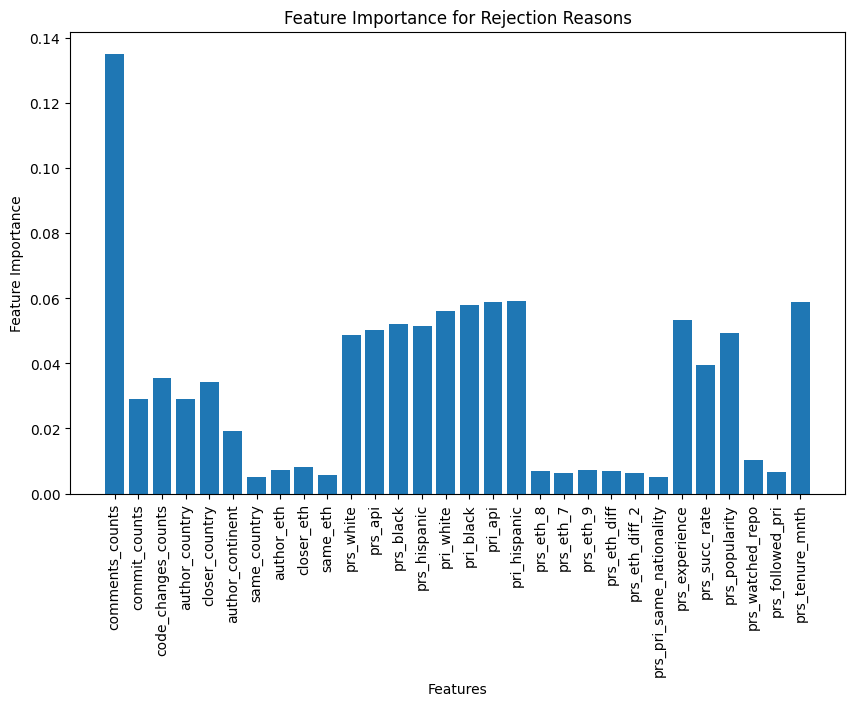

In [78]:
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Rejection Reasons')
plt.xticks(rotation=90)
plt.show()

In [79]:

y_pred = rf_classifier.predict(X_test)

# Step 2: Compare the predicted values with the actual target values
# Assuming you have 'y_test' containing the actual target values

# Step 3: Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.3997754070746771
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.25      0.01      0.02        77
           2       0.00      0.00      0.00        19
           3       0.95      0.64      0.77       249
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00       108
           6       0.25      0.08      0.12       171
           7       0.13      0.03      0.05       206
           8       1.00      0.02      0.04        55
           9       0.39      0.74      0.51       492
          10       0.29      0.42      0.35       390

    accuracy                           0.40      1781
   macro avg       0.30      0.18      0.17      1781
weighted avg       0.39      0.40      0.34      1781



/Users/amirrshams/miniforge3/envs/m1_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirrshams/miniforge3/envs/m1_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirrshams/miniforge3/envs/m1_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### Not concidering race

In [60]:
df_encoded.drop(['author_country', 'closer_country', 'author_continent','author_eth', 'same_country', 'closer_eth', 'same_eth', 'prs_white', 'prs_api', 'prs_black', 'prs_hispanic', 'pri_white', 'pri_black', 'pri_api', 'pri_hispanic', 'prs_eth_8', 'prs_eth_7', 'prs_eth_9', 'prs_eth_diff', 'prs_eth_diff_2', 'prs_pri_same_nationality'], axis=1, inplace=True)

In [61]:
df_encoded.head()

,comments_counts,commit_counts,code_changes_counts,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis
0,0,1.0,1,371,67,4,0,0,28,3
1,0,1.0,9,1578,32,7,0,0,44,3
2,0,1.0,1,64,59,51,1,0,6,3
3,3,1.0,1,276,40,245,1,1,35,3
4,1,1.0,3,11,0,1,1,1,8,9


In [66]:
df_ieee.head()

,Unnamed: 0,repo_id,pr_status,prs_id,pr_id,repo_pr_tenure_mnth,repo_pr_popularity,repo_pr_team_size,perc_external_contribs,pr_opened_at,prs_country,prs_continent,prm_country,prc_country,prs_pri_same_nationality,prs_experience,prs_succ_rate,pr_files_changed,pr_lines_changed,prs_main_team_member,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,pr_comments_counts,pr_num_commits,prs_eth,prc_eth,prm_eth,pr_nth,same_eth,pri_id,intra_branch,prm_id,prc_id,pri_id.1,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
0,1,2,not-merged,29988,33026,32,1,0,100,1329427085,united states,North America,\N,japan,0,7,29,0,0,0,9,0,0,47,8,1,White,White,Unknown,1,1,2,0,\N,2,2,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White
1,2,2,merged,282734,852598,30,1,2,100,1325669029,\N,\N,japan,japan,0,6,33,0,0,0,2,0,0,10,17,1,Unknown,White,White,2,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
2,3,2,merged,282734,1052366,30,1,3,100,1323724213,\N,\N,japan,japan,0,5,20,0,0,0,2,0,0,9,4,1,Unknown,White,White,1,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
3,4,3,merged,163945,12308,17,37,0,35,1344393044,united states,North America,\N,\N,0,0,0,0,0,0,21,0,1,28,4,4,White,White,White,1,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White
4,5,3,merged,163945,148263,18,38,6,38,1345400474,united states,North America,\N,\N,0,2,100,0,0,0,21,0,1,28,1,2,White,White,White,3,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White


In [63]:
X = df_encoded.drop(['manual_analysis'], axis=1)
y = df_encoded['manual_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Train a random forest classifier
rf_classifier_wr = RandomForestClassifier(random_state=42)
rf_classifier_wr.fit(X_train, y_train)

# Determine feature importances
feature_importances = rf_classifier_wr.feature_importances_

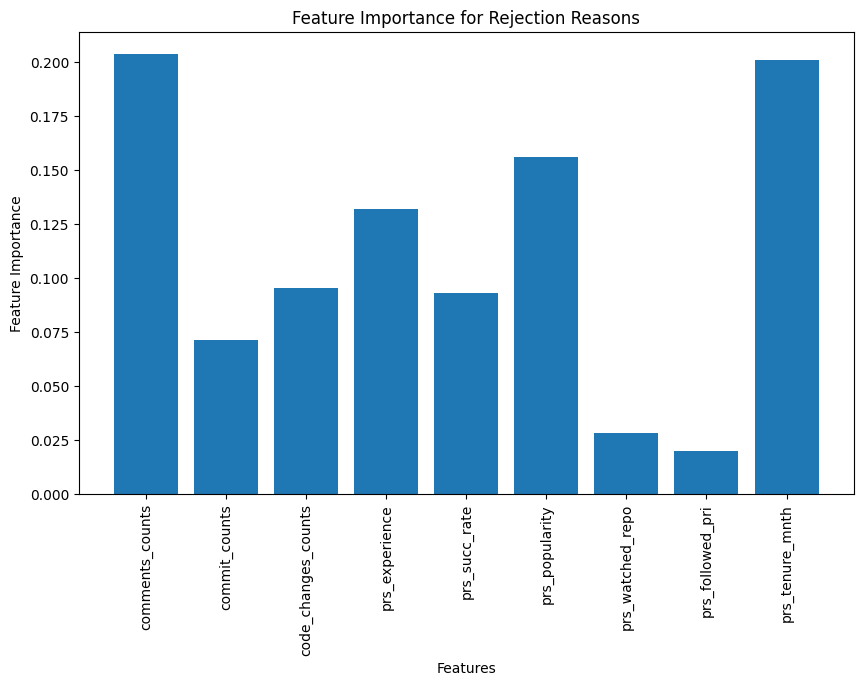

In [65]:
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Rejection Reasons')
plt.xticks(rotation=90)
plt.show()

In [70]:

y_pred = rf_classifier_wr.predict(X_test)

# Step 2: Compare the predicted values with the actual target values
# Assuming you have 'y_test' containing the actual target values

# Step 3: Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.3717012914093206
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.05      0.01      0.02        77
           2       0.00      0.00      0.00        19
           3       0.88      0.65      0.75       249
           4       1.00      0.12      0.22         8
           5       0.15      0.05      0.07       108
           6       0.14      0.09      0.11       171
           7       0.11      0.06      0.08       206
           8       0.00      0.00      0.00        55
           9       0.39      0.63      0.48       492
          10       0.30      0.40      0.35       390

    accuracy                           0.37      1781
   macro avg       0.28      0.18      0.19      1781
weighted avg       0.34      0.37      0.34      1781



/Users/amirrshams/miniforge3/envs/m1_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirrshams/miniforge3/envs/m1_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirrshams/miniforge3/envs/m1_gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m